<a href="https://colab.research.google.com/github/SuyashPatil-max/UIDAI_repo/blob/main/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [268]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [269]:
# !unzip '/content/deom_zip.zip'
df = pd.read_csv('demo.csv')
df.shape

(2071700, 6)

In [270]:
print(df.shape)
print(df.duplicated().sum())
df = df.drop_duplicates()
print(df.shape)

(2071700, 6)
473601
(1598099, 6)


In [271]:
palet =['#240750','#344C64','#577B8D','#57A6A1']

In [272]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', dayfirst=True)
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
pincode = df['pincode']
df = df.drop('date',axis  =1 )

In [273]:
df.head()

,state,district,pincode,demo_age_5_17,demo_age_17_,year,month,day
0,Uttar Pradesh,Gorakhpur,273213,49,529,2025,3,1
1,Andhra Pradesh,Chittoor,517132,22,375,2025,3,1
2,Gujarat,Rajkot,360006,65,765,2025,3,1
3,Andhra Pradesh,Srikakulam,532484,24,314,2025,3,1
4,Rajasthan,Udaipur,313801,45,785,2025,3,1


In [274]:
dist_day_year = df[['district','day']]
df = df.drop(['district','day','year'],axis =1 )

In [275]:
df.head()

,state,pincode,demo_age_5_17,demo_age_17_,month
0,Uttar Pradesh,273213,49,529,3
1,Andhra Pradesh,517132,22,375,3
2,Gujarat,360006,65,765,3
3,Andhra Pradesh,532484,24,314,3
4,Rajasthan,313801,45,785,3


In [276]:
df['state'].value_counts().index

Index(['Andhra Pradesh', 'Tamil Nadu', 'Uttar Pradesh', 'Maharashtra',
       'West Bengal', 'Karnataka', 'Kerala', 'Gujarat', 'Bihar', 'Odisha',
       'Telangana', 'Rajasthan', 'Madhya Pradesh', 'Assam', 'Punjab',
       'Jharkhand', 'Chhattisgarh', 'Haryana', 'Himachal Pradesh',
       'Uttarakhand', 'Jammu and Kashmir', 'Orissa', 'Delhi', 'Tripura',
       'Manipur', 'Goa', 'Meghalaya', 'Arunachal Pradesh', 'Nagaland',
       'Mizoram', 'Sikkim', 'Puducherry', 'Pondicherry', 'Chandigarh',
       'Andaman and Nicobar Islands', 'Ladakh', 'Lakshadweep',
       'Dadra and Nagar Haveli and Daman and Diu', 'Andaman & Nicobar Islands',
       'Daman and Diu', 'Jammu & Kashmir', 'Dadra and Nagar Haveli',
       'Daman & Diu', 'West Bangal', 'Dadra & Nagar Haveli', 'West  Bengal',
       'Westbengal', 'WEST BENGAL', 'andhra pradesh', 'WESTBENGAL',
       'West bengal', 'ODISHA', 'odisha', 'west Bengal', 'Uttaranchal',
       'West Bengli', 'Chhatisgarh', '100000', 'Darbhanga', 'BALANAGAR',


In [277]:
df['state'] = df['state'].replace(['Uttaranchal','Uttarakhand'],'UK')
df['state'] = df['state'].replace('Himachal Pradesh','HP')
df['state'] = df['state'].replace('Jharkhand','JK')
df['state'] = df['state'].replace(['Rajasthan','Jaipur'],'RJ')
df['state'] = df['state'].replace('Uttar Pradesh','UP')
df['state'] = df['state'].replace('Madhya Pradesh','MP')
df['state'] = df['state'].replace(['Puttenahalli','Karnataka'],'KA')
df['state'] = df['state'].replace(['Chhatisgarh','Chhattisgarh'],'CG')
df['state'] = df['state'].replace(['Orissa','ODISHA','odisha'],'Odisha')
df['state'] = df['state'].replace(['Daman and Diu','Dadra and Nagar Haveli','Dadra & Nagar Haveli','Daman & Diu',
                                   'Dadra and Nagar Haveli and Daman and Diu'],'DnH_DND')
df['state'] = df['state'].replace('Darbhanga','Bihar')
df['state'] = df['state'].replace(['Andaman & Nicobar Islands','Andaman and Nicobar Islands'],'A&N_I')
df['state'] = df['state'].replace(['Raja Annamalai Puram','Tamil Nadu'],'TN')

In [278]:
df['state'] = df['state'].replace(['andhra pradesh','Madanapalle','BALANAGAR','Andra Pradesh','Andhra Pradesh'],'AP')
df['state'] = df['state'].replace(['Nagpur','Maharashtra'],'MH')
df['state'] = df['state'].replace(['Jammu and Kashmir','Jammu & Kashmir'],'J&K')
df['state'] = df['state'].replace('Pondicherry','Puducherry')
df['state'] = df['state'].replace(['West Bangal','Westbengal','West  Bengal','WEST BENGAL','WESTBENGAL','West bengal','west Bengal'
                                    ,'West Bengli','West Bengal'],'WB')

In [279]:
mask1 = df['state'] == '100000'
mask1 = df[mask1]
idx = mask1.index
df = df.drop(idx)

In [280]:
print(df['state'].value_counts().index)
print(df['state'].value_counts().shape)

Index(['AP', 'TN', 'UP', 'MH', 'WB', 'KA', 'Odisha', 'Kerala', 'Gujarat',
       'Bihar', 'Telangana', 'RJ', 'MP', 'Assam', 'Punjab', 'JK', 'CG',
       'Haryana', 'HP', 'UK', 'J&K', 'Delhi', 'Tripura', 'Manipur', 'Goa',
       'Meghalaya', 'Puducherry', 'Arunachal Pradesh', 'Nagaland', 'Mizoram',
       'Sikkim', 'Chandigarh', 'A&N_I', 'DnH_DND', 'Ladakh', 'Lakshadweep'],
      dtype='object', name='state')
(36,)


In [281]:
df['state'].unique().shape

(36,)

In [282]:
df.head()

,state,pincode,demo_age_5_17,demo_age_17_,month
0,UP,273213,49,529,3
1,AP,517132,22,375,3
2,Gujarat,360006,65,765,3
3,AP,532484,24,314,3
4,RJ,313801,45,785,3


In [283]:
df.shape

(1598097, 5)

In [284]:
df.describe().round(3)

,pincode,demo_age_5_17,demo_age_17_,month
count,1598097.000,1598097.000,1598097.000,1598097.000
mean,526622.588,2.251,20.649,10.592
std,197474.642,13.919,117.707,1.360
min,110001.000,0.000,0.000,3.000
25%,396130.000,0.000,2.000,10.000
50%,524223.000,1.000,6.000,11.000
75%,691573.000,2.000,15.000,12.000
max,855456.000,2690.000,16166.000,12.000


In [285]:
# for i in ['pincode','demo_age_5_17','demo_age_17_','month'] :
#   sns.boxplot(x = df[i])
#   plt.title(i)
#   plt.show()

In [286]:
pincode = df['pincode']
df = df.drop('pincode',axis= 1 )
df.head()

,state,demo_age_5_17,demo_age_17_,month
0,UP,49,529,3
1,AP,22,375,3
2,Gujarat,65,765,3
3,AP,24,314,3
4,RJ,45,785,3


In [287]:
df['total_age'] = df['demo_age_5_17'] + df['demo_age_17_']
df.head()

,state,demo_age_5_17,demo_age_17_,month,total_age
0,UP,49,529,3,578
1,AP,22,375,3,397
2,Gujarat,65,765,3,830
3,AP,24,314,3,338
4,RJ,45,785,3,830


In [288]:
# sns.scatterplot(x = 'demo_age_5_17', y= 'demo_age_17_',hue ='month',palette ='Set3',data =df )
# plt.title('age scatterplot')
# plt.show()

In [289]:
south = ['MH','KA','Tamil Nadu','AP','Telangana','Kerala','Gujarat','Goa']
terr = ['Delhi','A&N_I','Ladakh','Puducherry','DnH_DnD', 'Ladakh', 'Lakshadweep','Chandigarh']
sisters = [ 'Assam', 'Tripura','Manipur','Meghalaya','Arunachal Pradesh','Nagaland','Mizoram','Sikkim']
north = []
top_terr = south + terr + sisters
for i in df['state'].value_counts().index :
  if i in top_terr :
    pass
  else :
    north.append(i)

In [290]:
south_mask = df['state'].isin(south)
terr_mask = df['state'].isin(terr)
sisters_mask = df['state'].isin(sisters)
north_mask = df['state'].isin(north)

In [291]:
df_south = df[south_mask]
df_north = df[north_mask]
df_sisters = df[sisters_mask]
df_terr = df[terr_mask]

In [292]:
df_south.head()

,state,demo_age_5_17,demo_age_17_,month,total_age
1,AP,22,375,3,397
2,Gujarat,65,765,3,830
3,AP,24,314,3,338
6,KA,88,332,3,420
8,AP,83,986,3,1069


/tmp/ipython-input-1403827467.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'state', y= 'demo_age_17_',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-1403827467.py:3: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = 'state', y= 'demo_age_17_',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-1403827467.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


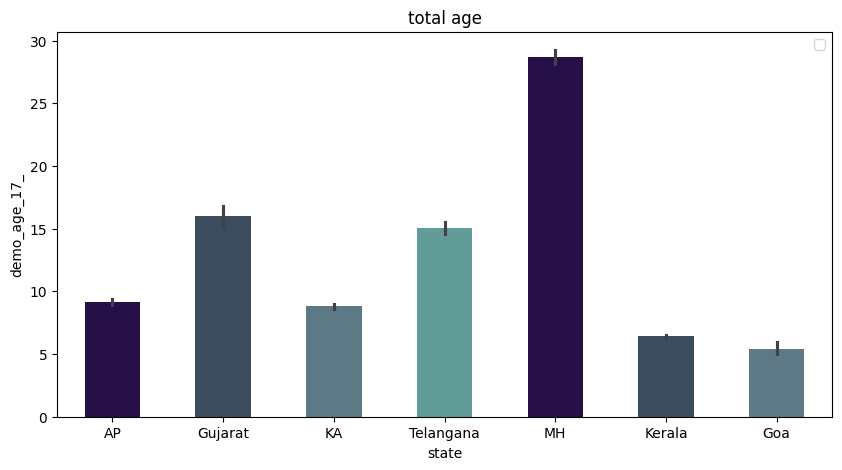

/tmp/ipython-input-1403827467.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'state', y= 'demo_age_17_',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-1403827467.py:3: UserWarning: 
The palette list has fewer values (4) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = 'state', y= 'demo_age_17_',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-1403827467.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


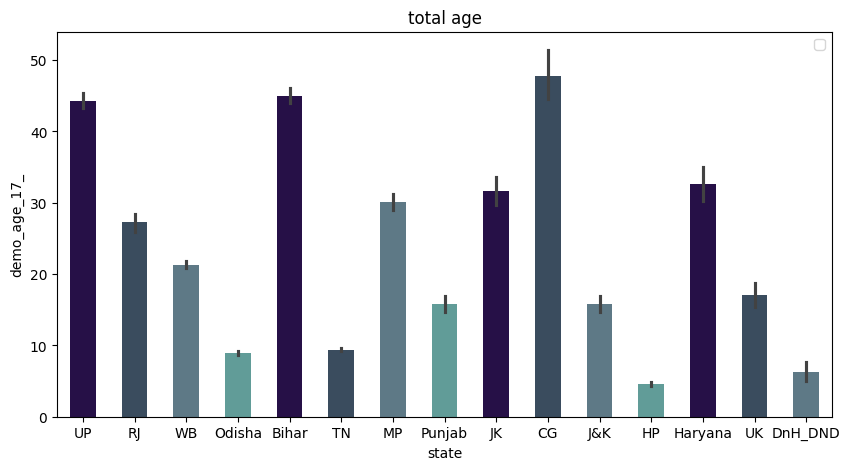

/tmp/ipython-input-1403827467.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'state', y= 'demo_age_17_',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-1403827467.py:3: UserWarning: 
The palette list has fewer values (4) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = 'state', y= 'demo_age_17_',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-1403827467.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


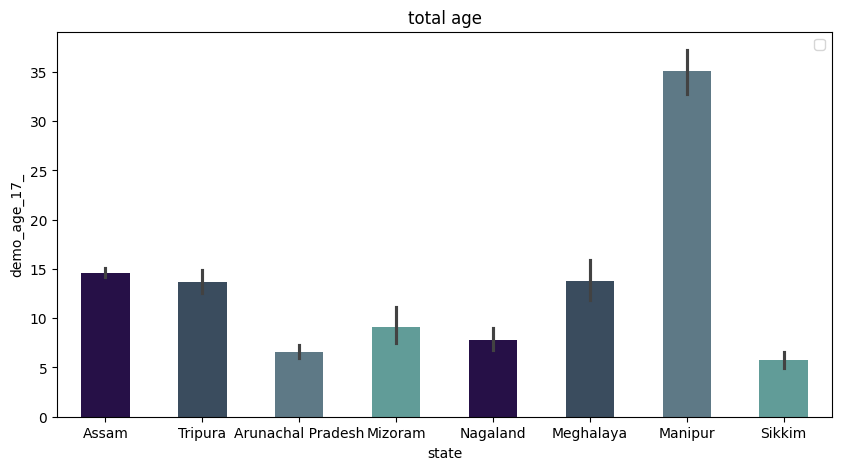

/tmp/ipython-input-1403827467.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'state', y='demo_age_17_',data = df_terr,palette = palet,width=0.5)
/tmp/ipython-input-1403827467.py:9: UserWarning: 
The palette list has fewer values (4) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = 'state', y='demo_age_17_',data = df_terr,palette = palet,width=0.5)
/tmp/ipython-input-1403827467.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


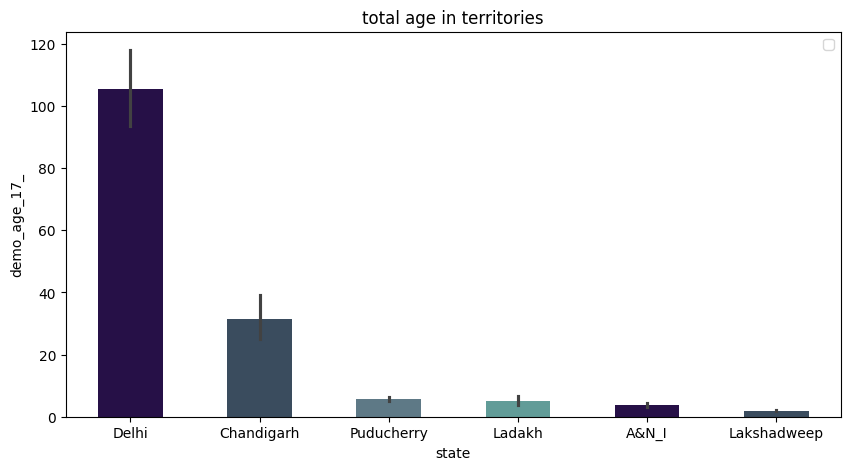

In [293]:
for X in df_south ,df_north ,df_sisters  :
  plt.figure(figsize=(10,5))
  sns.barplot(x = 'state', y= 'demo_age_17_',data = X ,palette =palet,width=0.5)
  plt.title('total age')
  plt.legend()
  plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x = 'state', y='demo_age_17_',data = df_terr,palette = palet,width=0.5)
plt.title('total age in territories')
plt.legend()
plt.show()

/tmp/ipython-input-2053714198.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'state', y= 'demo_age_5_17',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-2053714198.py:3: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = 'state', y= 'demo_age_5_17',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-2053714198.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


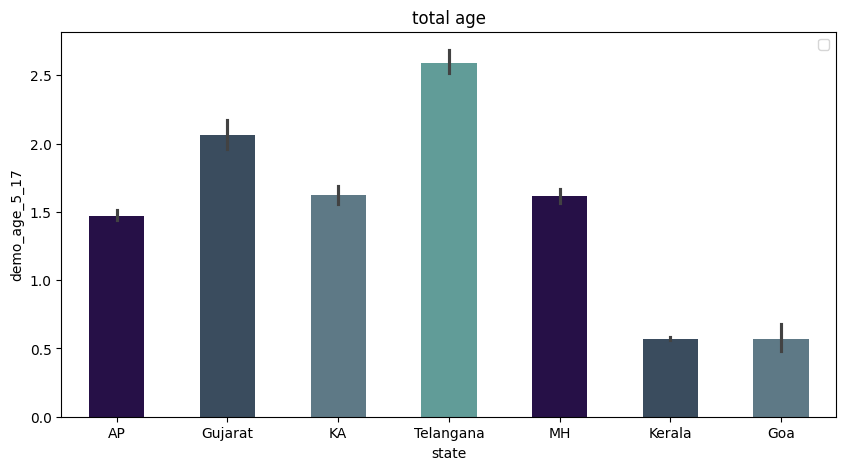

/tmp/ipython-input-2053714198.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'state', y= 'demo_age_5_17',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-2053714198.py:3: UserWarning: 
The palette list has fewer values (4) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = 'state', y= 'demo_age_5_17',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-2053714198.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


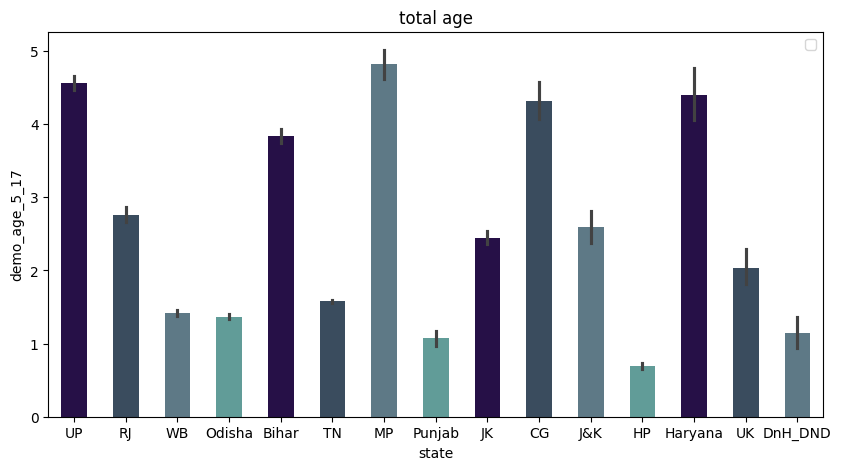

/tmp/ipython-input-2053714198.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'state', y= 'demo_age_5_17',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-2053714198.py:3: UserWarning: 
The palette list has fewer values (4) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = 'state', y= 'demo_age_5_17',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-2053714198.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


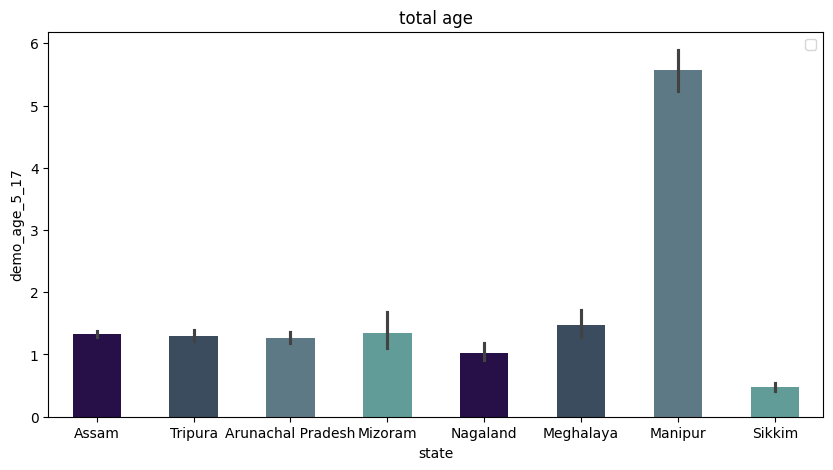

/tmp/ipython-input-2053714198.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'state', y= 'demo_age_5_17',data = df_terr,palette =palet,width=0.5)
/tmp/ipython-input-2053714198.py:9: UserWarning: 
The palette list has fewer values (4) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = 'state', y= 'demo_age_5_17',data = df_terr,palette =palet,width=0.5)
/tmp/ipython-input-2053714198.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


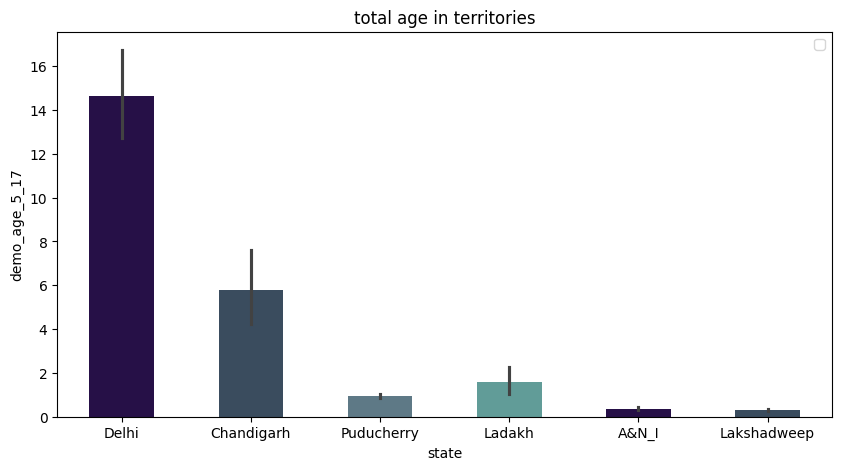

In [294]:
for X in df_south ,df_north ,df_sisters  :
  plt.figure(figsize=(10,5))
  sns.barplot(x = 'state', y= 'demo_age_5_17',data = X ,palette =palet,width=0.5)
  plt.title('total age')
  plt.legend()
  plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x = 'state', y= 'demo_age_5_17',data = df_terr,palette =palet,width=0.5)
plt.title('total age in territories')
plt.legend()
plt.show()

In [295]:
df['regions'] = df['state']
df['regions'] = df['regions'].replace(south,'south_region')
df['regions'] = df['regions'].replace(sisters,'sisters_region')
df['regions'] = df['regions'].replace(terr,'territories_region')
df['regions'] = df['regions'].replace(north,'north_region')

In [296]:
df.head()

,state,demo_age_5_17,demo_age_17_,month,total_age,regions
0,UP,49,529,3,578,north_region
1,AP,22,375,3,397,south_region
2,Gujarat,65,765,3,830,south_region
3,AP,24,314,3,338,south_region
4,RJ,45,785,3,830,north_region


/tmp/ipython-input-1434876682.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'regions',y ='total_age',palette =palet,data =df )
/tmp/ipython-input-1434876682.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


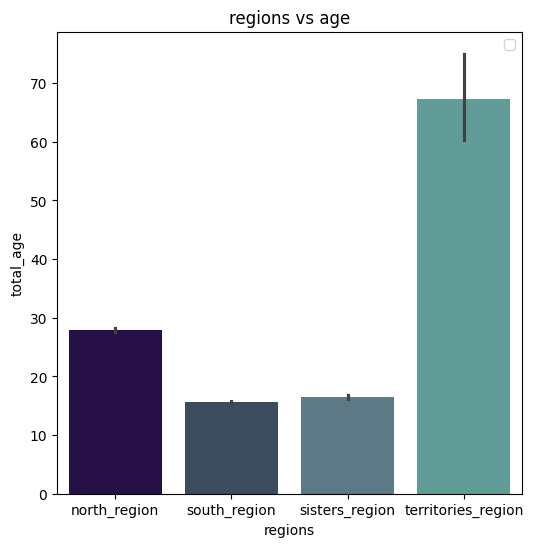

In [297]:
plt.figure(figsize=(6,6))
sns.barplot(x= 'regions',y ='total_age',palette =palet,data =df )
plt.legend()
plt.title('regions vs age')
plt.show()

/tmp/ipython-input-4244964993.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'regions',y ='demo_age_5_17',palette =palet,data =df )
/tmp/ipython-input-4244964993.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


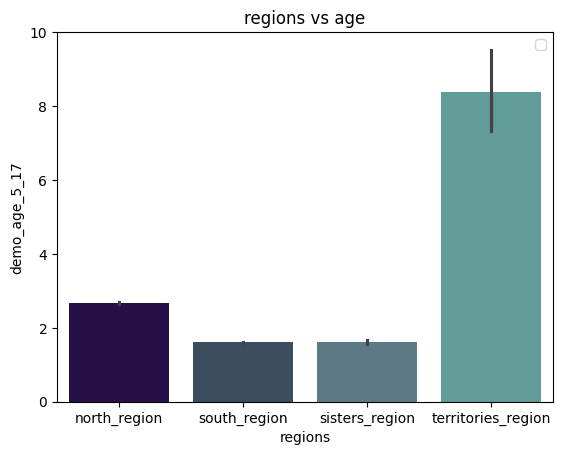

/tmp/ipython-input-4244964993.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'regions',y ='demo_age_17_',palette =palet,data =df )
/tmp/ipython-input-4244964993.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


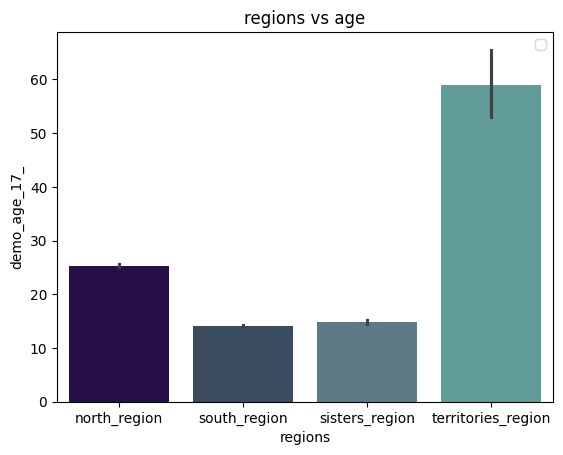

In [298]:
sns.barplot(x= 'regions',y ='demo_age_5_17',palette =palet,data =df )
plt.legend()
plt.title('regions vs age')
plt.show()


sns.barplot(x= 'regions',y ='demo_age_17_',palette =palet,data =df )
plt.legend()
plt.title('regions vs age')
plt.show()

In [299]:
df['youth_ratio'] = df['demo_age_5_17']/df['demo_age_17_']
df.head()

,state,demo_age_5_17,demo_age_17_,month,total_age,regions,youth_ratio
0,UP,49,529,3,578,north_region,0.092628
1,AP,22,375,3,397,south_region,0.058667
2,Gujarat,65,765,3,830,south_region,0.084967
3,AP,24,314,3,338,south_region,0.076433
4,RJ,45,785,3,830,north_region,0.057325


/tmp/ipython-input-72102113.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'regions',y ='youth_ratio',palette =palet,data =df)
/tmp/ipython-input-72102113.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


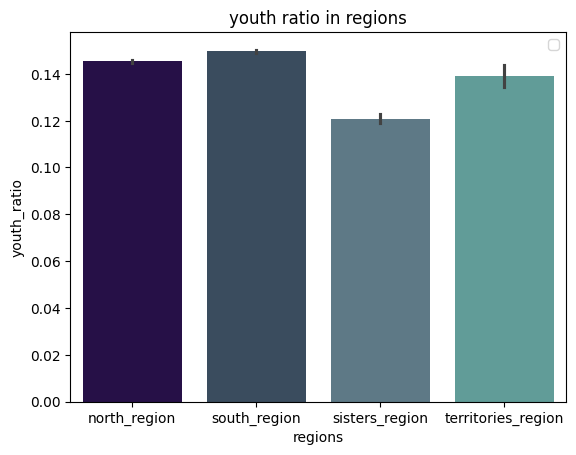

In [300]:
sns.barplot(x= 'regions',y ='youth_ratio',palette =palet,data =df)
plt.legend()
plt.title('youth ratio in regions')
plt.show()

/tmp/ipython-input-2990073850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['youth_ratio'] = X['demo_age_5_17']/X['demo_age_17_']
/tmp/ipython-input-2990073850.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'state', y= 'youth_ratio',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-2990073850.py:4: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = 'state', y= 'youth_ratio',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-2990073850.py:6: UserWarning: No artists with labels foun

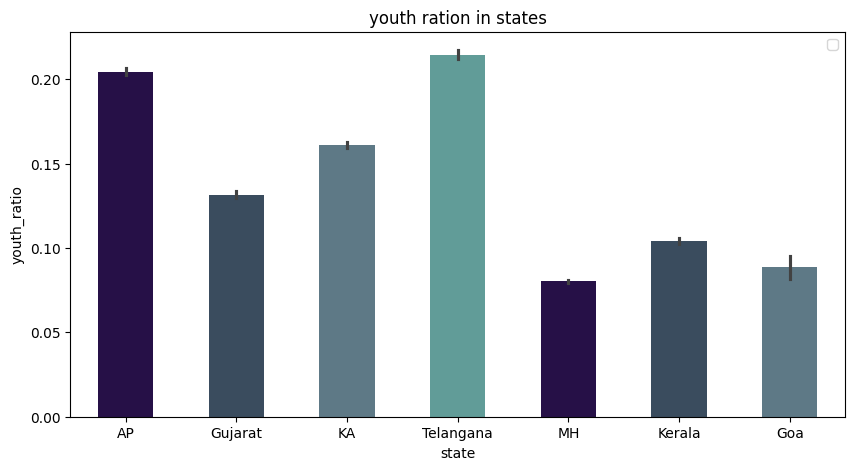

/tmp/ipython-input-2990073850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['youth_ratio'] = X['demo_age_5_17']/X['demo_age_17_']
/tmp/ipython-input-2990073850.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'state', y= 'youth_ratio',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-2990073850.py:4: UserWarning: 
The palette list has fewer values (4) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = 'state', y= 'youth_ratio',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-2990073850.py:6: UserWarning: No artists with labels fou

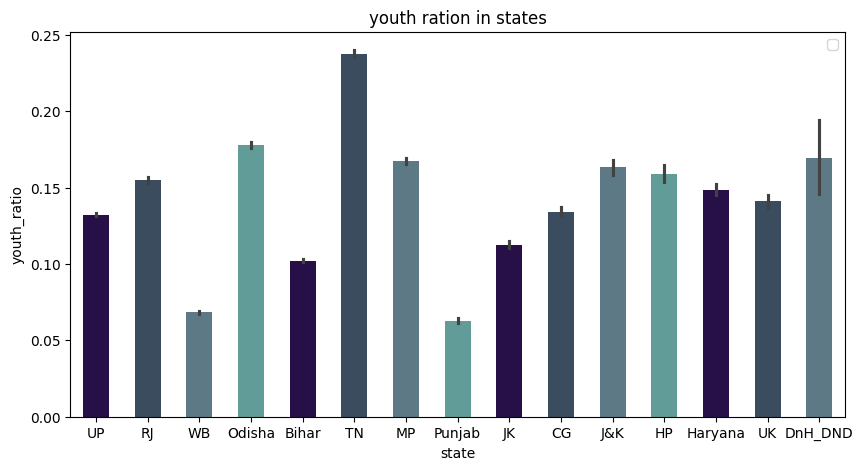

/tmp/ipython-input-2990073850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['youth_ratio'] = X['demo_age_5_17']/X['demo_age_17_']
/tmp/ipython-input-2990073850.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'state', y= 'youth_ratio',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-2990073850.py:4: UserWarning: 
The palette list has fewer values (4) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = 'state', y= 'youth_ratio',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-2990073850.py:6: UserWarning: No artists with labels foun

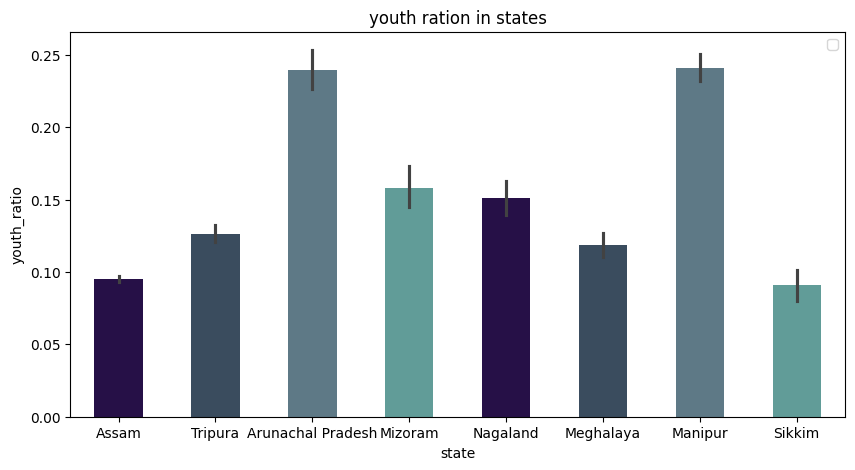

/tmp/ipython-input-2990073850.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_terr['youth_ratio'] = df_terr['demo_age_5_17']/df_terr['demo_age_17_']
/tmp/ipython-input-2990073850.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'state', y= 'youth_ratio',data = df_terr,palette =palet,width=0.5)
/tmp/ipython-input-2990073850.py:11: UserWarning: 
The palette list has fewer values (4) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = 'state', y= 'youth_ratio',data = df_terr,palette =palet,width=0.5)
/tmp/ipython-input-2990073850.py:13: UserWarn

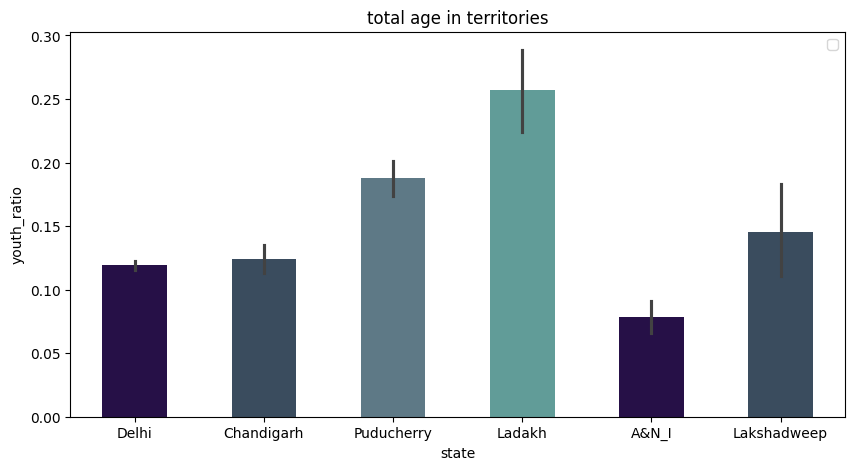

In [301]:
for X in df_south ,df_north ,df_sisters  :
  X['youth_ratio'] = X['demo_age_5_17']/X['demo_age_17_']
  plt.figure(figsize=(10,5))
  sns.barplot(x = 'state', y= 'youth_ratio',data = X ,palette =palet,width=0.5)
  plt.title('youth ration in states')
  plt.legend()
  plt.show()

plt.figure(figsize=(10,5))
df_terr['youth_ratio'] = df_terr['demo_age_5_17']/df_terr['demo_age_17_']
sns.barplot(x = 'state', y= 'youth_ratio',data = df_terr,palette =palet,width=0.5)
plt.title('total age in territories')
plt.legend()
plt.show()

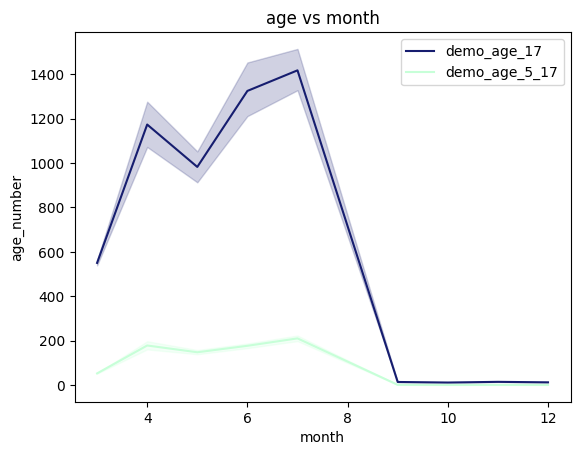

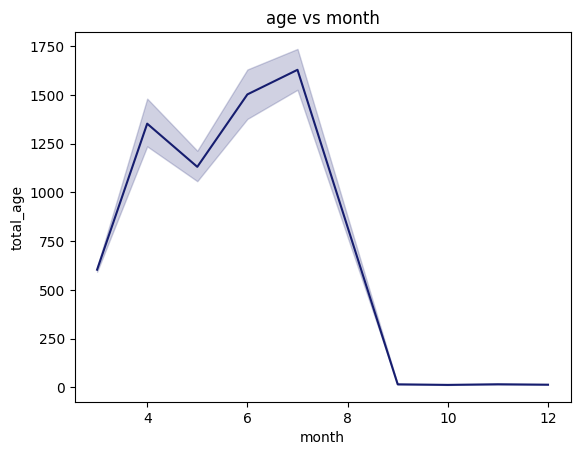

In [302]:
sns.lineplot(x='month',y = 'demo_age_17_',data =df ,color ='#161D6F',label='demo_age_17')
sns.lineplot(x='month',y = 'demo_age_5_17',data =df ,color ='#C7FFD8',label='demo_age_5_17')
plt.legend()
plt.title('age vs month')
plt.ylabel('age_number')
plt.xlabel('month')
plt.show()

sns.lineplot(x='month',y = 'total_age',data =df ,color ='#161D6F')
plt.title('age vs month')
plt.show()

In [303]:
df.head()

,state,demo_age_5_17,demo_age_17_,month,total_age,regions,youth_ratio
0,UP,49,529,3,578,north_region,0.092628
1,AP,22,375,3,397,south_region,0.058667
2,Gujarat,65,765,3,830,south_region,0.084967
3,AP,24,314,3,338,south_region,0.076433
4,RJ,45,785,3,830,north_region,0.057325


/tmp/ipython-input-3831379694.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x= 'month',y ='total_age',palette =palet,data =df )
/tmp/ipython-input-3831379694.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


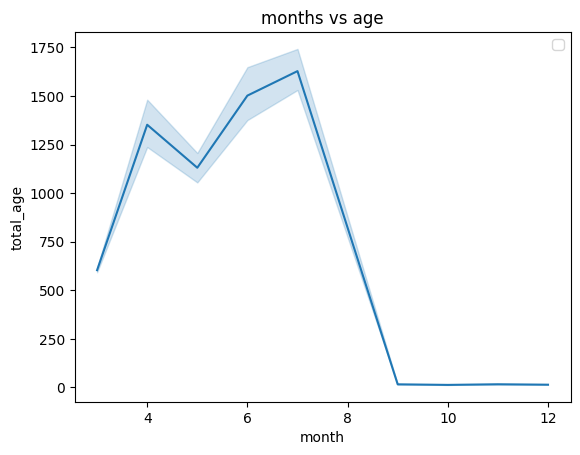

In [304]:
sns.lineplot(x= 'month',y ='total_age',palette =palet,data =df )
plt.legend()
plt.title('months vs age')
plt.show()

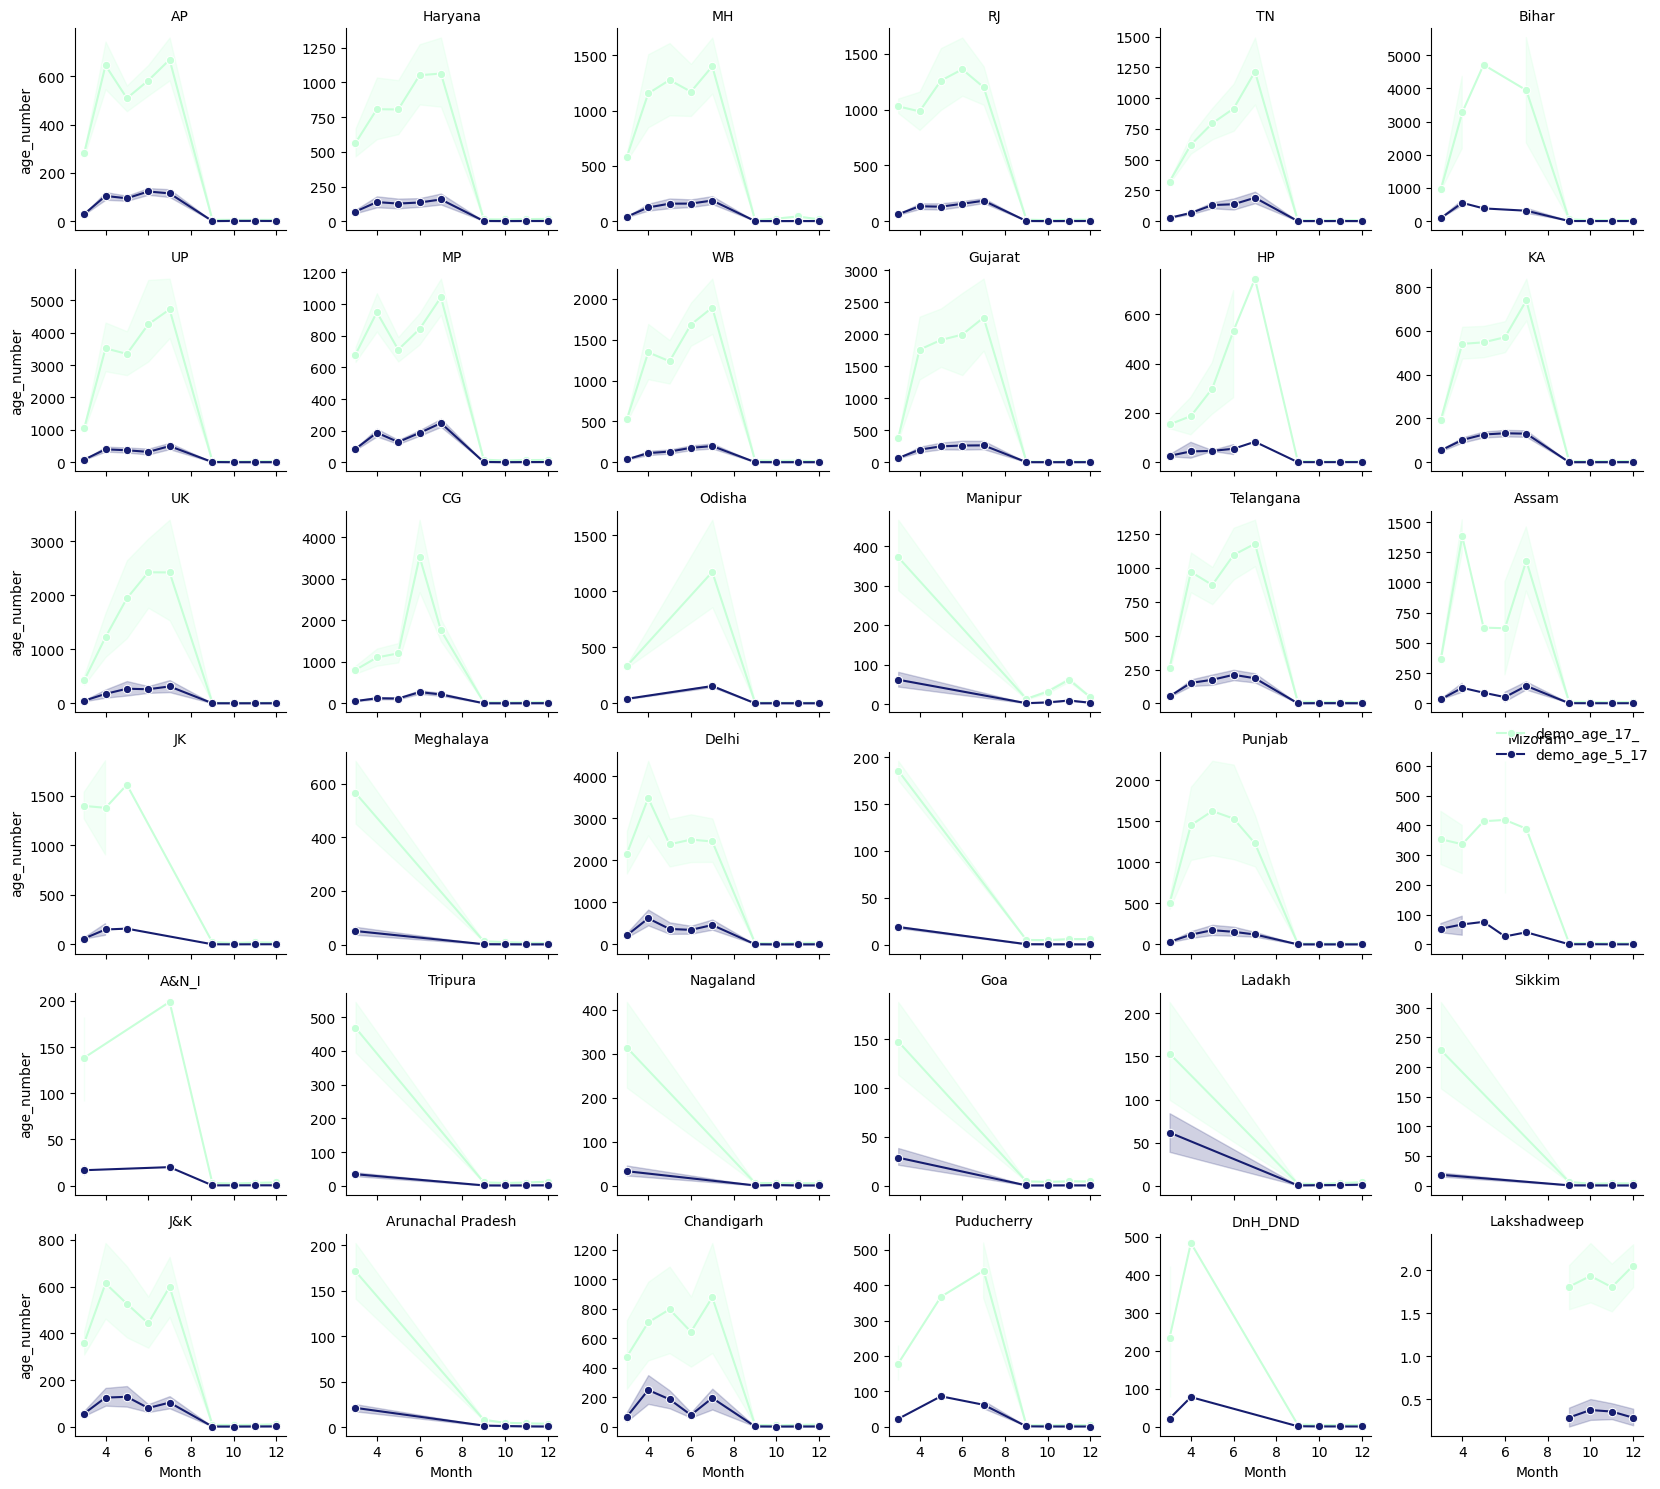

In [305]:
# ---- reshape to long format ----
# df= df.reset_index()

df_long = df.melt(id_vars=['state', 'month'],value_vars=[ 'demo_age_5_17','demo_age_17_'],var_name='age_group',value_name='enrolled')
df_long = df_long.sort_values('month')

palette = {'demo_age_5_17': '#161D6F','demo_age_17_': '#C7FFD8'}
g = sns.FacetGrid(df_long,col='state',col_wrap=6,height=2.5,sharey=False )
g.map_dataframe(sns.lineplot,x='month',y='enrolled',hue='age_group',marker='o',palette =palette)

g.add_legend()
g.set_axis_labels('Month', 'age_number')
g.set_titles('{col_name}')
plt.tight_layout()
plt.show()

In [306]:
df.head()

,state,demo_age_5_17,demo_age_17_,month,total_age,regions,youth_ratio
0,UP,49,529,3,578,north_region,0.092628
1,AP,22,375,3,397,south_region,0.058667
2,Gujarat,65,765,3,830,south_region,0.084967
3,AP,24,314,3,338,south_region,0.076433
4,RJ,45,785,3,830,north_region,0.057325
